In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [65]:
df = pd.read_csv("USA_Hourly_PC.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [66]:
df.shape

(121273, 2)

### Datetime conversion and Resampling the hourly data into daily

In [67]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index).astype('datetime64[ns]')

In [68]:
df.sort_values(by=['Datetime'], inplace=True)

In [69]:
df = df.resample('D').mean()

In [80]:
df.shape

(5055, 1)

In [73]:
df.to_csv("USA_Daily_PC_Sorted.csv")

<AxesSubplot:title={'center':'Hourly Energy Consumption in USA'}, xlabel='Datetime'>

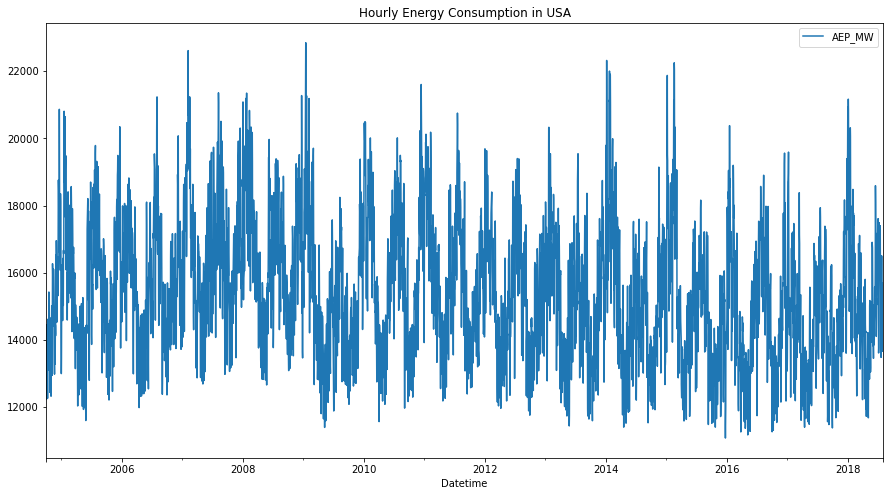

In [70]:
df.plot(figsize = (15,8), title="Hourly Energy Consumption in USA")

### Statistics for the null hypothesis having the non-stationary data

In [71]:
#here 'AIC' means the default value
#if p-value is less than 0.05, the dataset is stationary which you can clearly observe
dftest = adfuller(df['AEP_MW'],autolag="AIC")
print("ADF : ",dftest[0])
print("P-Value : ",dftest[1])
print("Num of Lags : ",dftest[2])
print("Num of Observations Used for ADF Regression and Critical Values Calcultaions : ",dftest[3])
print("Critical Values : ",dftest[4])

ADF :  -7.487515670339061
P-Value :  4.5971832394768194e-11
Num of Lags :  30
Num of Observations Used for ADF Regression and Critical Values Calcultaions :  5024
Critical Values :  {'1%': -3.4316522779278373, '5%': -2.8621154666284063, '10%': -2.5670763214801435}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


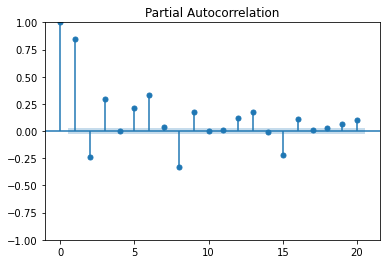

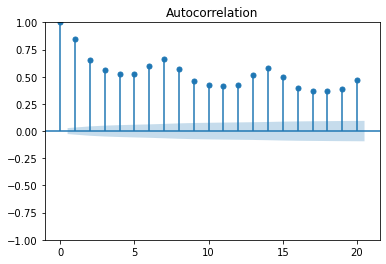

In [75]:
#Partial Autocorrelation gives only the direct effect of precious time lags with the current time
#Autocorrelation considers va rious indirect effects, that's why correlation is high for many lags 
pacf = plot_pacf(df['AEP_MW'],lags=20)
acf = plot_acf(df['AEP_MW'],lags=20)

In [76]:
X = df.values

In [77]:
train = X[:len(X)-14]
test = X[len(X)-14:]

In [111]:
model = AutoReg(train,lags=15).fit()

In [112]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 5041
Model:                    AutoReg(15)   Log Likelihood              -40637.081
Method:               Conditional MLE   S.D. of innovations            785.589
Date:                Tue, 27 Dec 2022   AIC                          81308.163
Time:                        17:53:23   BIC                          81419.043
Sample:                            15   HQIC                         81347.014
                                 5041                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        997.9167    111.976      8.912      0.000     778.447    1217.386
y.L1           1.0886      0.014     79.075      0.000       1.062       1.116
y.L2          -0.4387      0.020    -21.544      0.0

In [113]:
pred = model.predict(start=len(train),end=len(X)-1)

[14355.48566813 14489.29638163 16071.4031189  16659.75059966
 15887.21603784 15807.7934363  15806.96822864 15288.21778608
 15303.73830153 16249.69842448 16400.21254358 15632.33417209
 15605.77638799 15545.9151822 ]


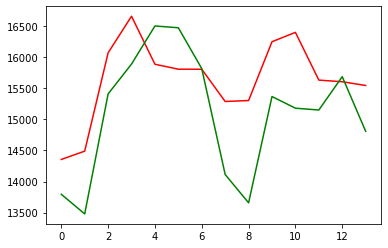

In [114]:
plt.plot(pred,color='red')
plt.plot(test,color='green')
print(pred)

In [117]:
#Future prediction
pred_future = model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print(pred_future)

[15013.29553904 15945.03351971 16248.33358279 15709.04551849
 15641.31709897 15640.66945365 15224.88692463]
